# Previsão de renda

## Etapa 1 CRISP - DM: Entendimento do negócio

A previsão de renda é útil pra diversas instituições financeiras, tal informação pode guiar em desisões como o valor máximo de empréstimos concedidos, limite de crédito para um cliente e também a oferta de classes de cartões para os clientes. Utilizando a base de dados que contém as informações de cadastro de outros clientes, é possível realizar a análise de como tais informações se relacionam com a renda apresentada para assim gerar previsões para futuros clientes.

Este projeto tem como objetivo realizar a análise dos dados e criar um modelo estatistico para a previsão de renda.

## Etapa 2 Crisp-DM: Entendimento dos dados
A base de dados utilizada neste projeto foi disponibilizada pela EBAC no curso de Ciência de Dados. 


### Dicionário de dados

Tabela que descreve as variáveis a serem trabalhadas:


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data do cadastro                                 | object  |
| id_cliente              |  Identificador único do cliente                   | int64   |
| sexo                    |  Sexo F ou M                                      | object  |
| posse_de_veiculo        |  Classifica se possui ou não veículo              | bool    |
| posse_de_imovel         |  Classifica se possui ou não imóvel               | bool    |
| qtd_filhos              |  Quantidade de filhos do cliente                  | int64   |
| tipo_renda              |  Fonte da renda do cliente                        | object  |
| educacao                |  Grau de educação formal do cliente               | object  |
| estado_civil            |  Estado civil do cliente                          | object  |
| tipo_residencia         |  Tipo de residência do cliente                    | object  |
| idade                   |  Idade do cliente                                 | int64   |
| tempo_emprego           |  Tempo (anos) em que o cliente está empregado     | float64 |
| qt_pessoas_residencia   |  Quantidade de pessoas na residência do cliente   | int64   |
| renda                   |  Renda total                                      | float64 |





#### Carregando os pacotes

Bibliotecas utilizadas:

In [1]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

from ydata_profiling import ProfileReport

from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

#### Carregando os dados

In [3]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [ ]:
renda.sample(5)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
14161,14161,2016-03-01,230,F,False,False,0,Assalariado,Secundário,Casado,Governamental,33,2.186301,2.0,1292.13
5942,5942,2015-06-01,12158,M,True,False,2,Assalariado,Secundário,Casado,Casa,43,4.520548,4.0,3421.45
9626,9626,2015-10-01,14385,F,False,True,0,Assalariado,Secundário,Casado,Casa,54,15.791781,2.0,7042.45
10219,10219,2015-11-01,5297,F,False,True,0,Assalariado,Secundário,Casado,Casa,50,2.010959,2.0,2664.70
8421,8421,2015-09-01,8769,F,False,True,0,Assalariado,Superior completo,Solteiro,Casa,46,0.279452,1.0,3678.38


#### Entendimento dos dados - Univariada

In [99]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [101]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Criação de um DataFrame com os metadados da base de dados utilizada:

In [7]:
metadados = pd.DataFrame({'dtypes': renda.dtypes})
metadados['missing'] = renda.isna().sum()
metadados['perc_missing'] = round((metadados['missing']/renda.shape[0])*100)
metadados['valores_unicos'] = renda.nunique()
metadados

,dtypes,missing,perc_missing,valores_unicos
Unnamed: 0,int64,0,0.0,15000
data_ref,object,0,0.0,15
id_cliente,int64,0,0.0,9845
sexo,object,0,0.0,2
posse_de_veiculo,bool,0,0.0,2
posse_de_imovel,bool,0,0.0,2
qtd_filhos,int64,0,0.0,8
tipo_renda,object,0,0.0,5
educacao,object,0,0.0,5
estado_civil,object,0,0.0,5


Distribuição da variável alvo e análise de suas características:

Text(0, 0.5, 'Contagem')

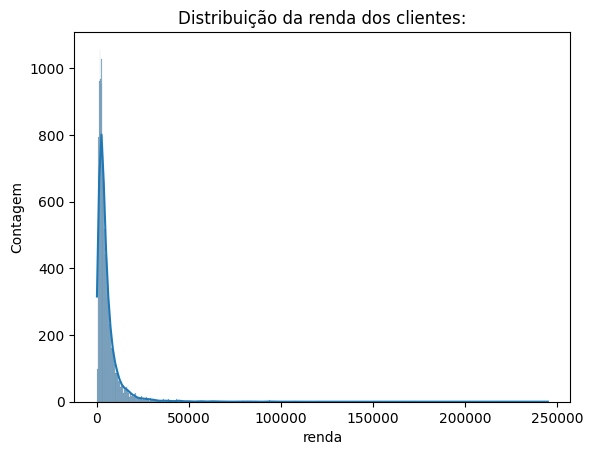

In [9]:
sns.histplot(data=renda,
            x='renda', 
            kde=True
            )
plt.title('Distribuição da renda dos clientes:')
plt.ylabel('Contagem')

A variável renda apresenta característica de descrescimento logarítmico. Para um entendimento melhor da sua característica e distribuição, é valido aplicar a função log na mesma.

Text(0, 0.5, 'Contagem')

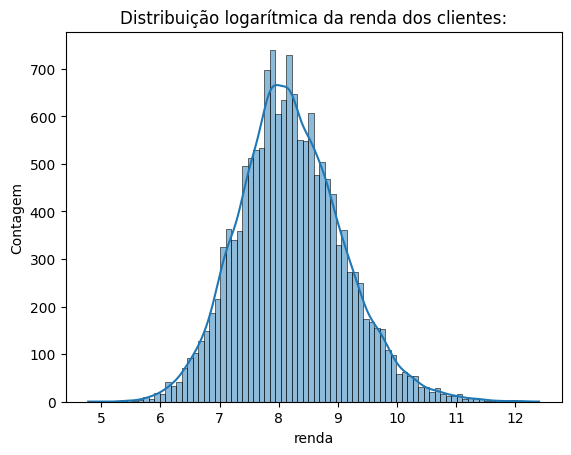

In [11]:
sns.histplot(data=renda, 
             x=np.log(renda['renda']),
             kde=True
             )
plt.title('Distribuição logarítmica da renda dos clientes:')
plt.ylabel('Contagem')

Desta forma, a distribuição da variável renda se apresenta de forma mais uniforme, facilitando a análise para futura modelagem.

### Entendimento dos dados - Bivariadas




##### Funções para plotar gráficos para análise das variáveis categóricas:

In [13]:
#Gráfico pointplot
def point (var: str):
    '''Recebe uma variável categórica e retorna 
    um pointplot da Renda média em função da variável'''
    
    plt.figure(figsize=(10,6))
    sns.pointplot(data=renda,
                  x=var,
                  y='renda',
                  dodge=True,
                  errorbar=('ci', 95)
                  )
    plt.title(f'Renda Média em Função de {var}')
    plt.ylabel('Renda Média (R$)')

In [15]:
#Gráfico barplot
def bar (var: str):
    '''Recebe uma variável categórica e retorna 
    um barplot da Renda média em função da variável'''
    
    plt.figure(figsize=(10,6))
    grb = renda.groupby(var)['renda'].mean().sort_values()
    ax = sns.barplot(x=grb.index,
                     y=grb,
                     palette='crest'
                    )
    ax.bar_label(ax.containers[0], fontsize=10)
    ax.tick_params(axis='x', rotation=30)
    ax.set_title(f'Renda Média em função de {var}')
    ax.set_ylabel('Renda Média (R$)')

##### Entendimento da correlação das variáveis numéricas:

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.360426,-0.063220,0.889777,0.029346
idade,-0.360426,1.000000,0.321573,-0.339320,0.022435
tempo_emprego,-0.063220,0.321573,1.000000,-0.065670,0.385013
qt_pessoas_residencia,0.889777,-0.339320,-0.065670,1.000000,0.047842
renda,0.029346,0.022435,0.385013,0.047842,1.000000


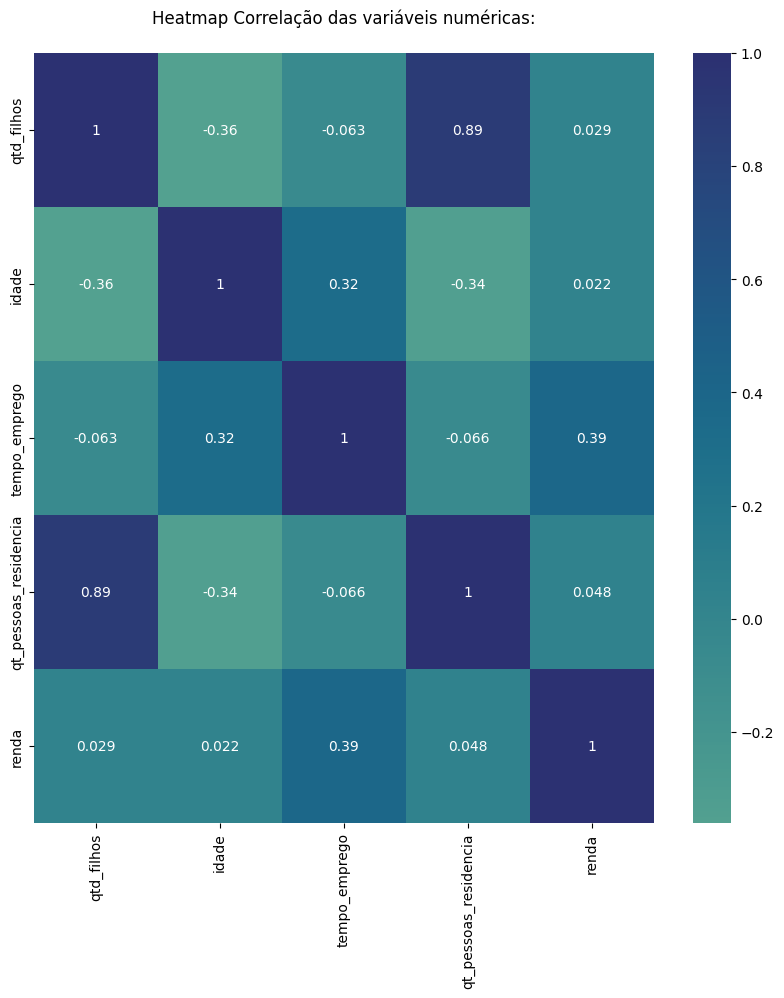

In [17]:
renda_num = list(renda.select_dtypes('number'))
plt.figure(figsize=(10,10))
plt.title('Heatmap Correlação das variáveis numéricas:\n')
sns.heatmap(renda[renda_num].drop(['Unnamed: 0', 'id_cliente'], axis=1).corr(),
               annot=True, 
               center = 0, 
               cmap='crest')
renda[renda_num].drop(['Unnamed: 0', 'id_cliente'], axis=1).corr()

Dentre as variáveis numéricas `tempo_emprego` é a que apresenta maior correlação com a variável alvo, a `renda`. Com cerca de 38% de correlação, apresenta um bom potencial preditivo. 

##### Análise da distribuição da variável `renda` em função da variável `tempo_emprego`:

Text(0.5, 1.0, 'Distruibuição da renda em função do tempo de emprego:')

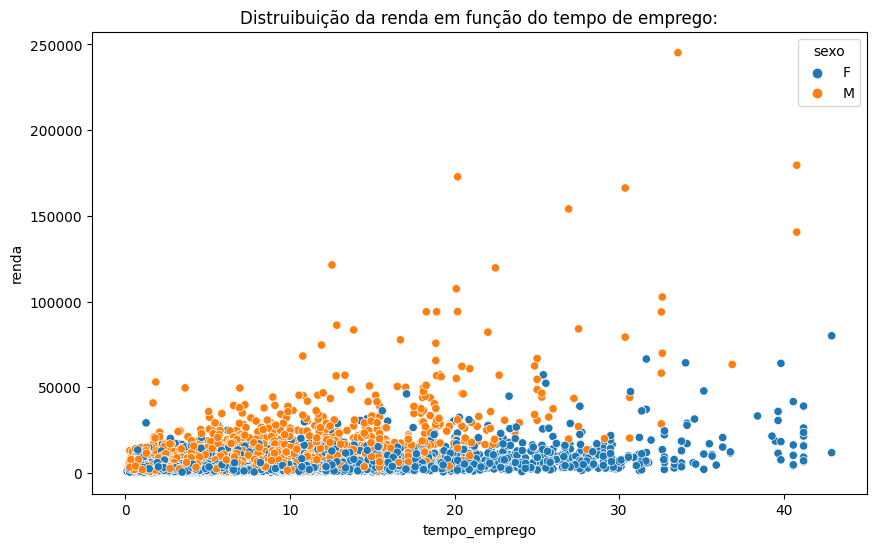

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=renda.dropna(),
                x='tempo_emprego',
                y='renda',
                hue='sexo'
                )
plt.title('Distruibuição da renda em função do tempo de emprego:')

Como constatado acima, neste gráfico de distibuição, nota-se a correlação existente entre `renda` e `tempo_emprego`. Porém, apresentando valores diferentes para o sexo masculino e feminino. Tal diferença indica que a variável `sexo` pode apresentar potencial preditivo sobre a `renda`.

##### Análise das variáveis categóricas em relação a renda média dos clientes:

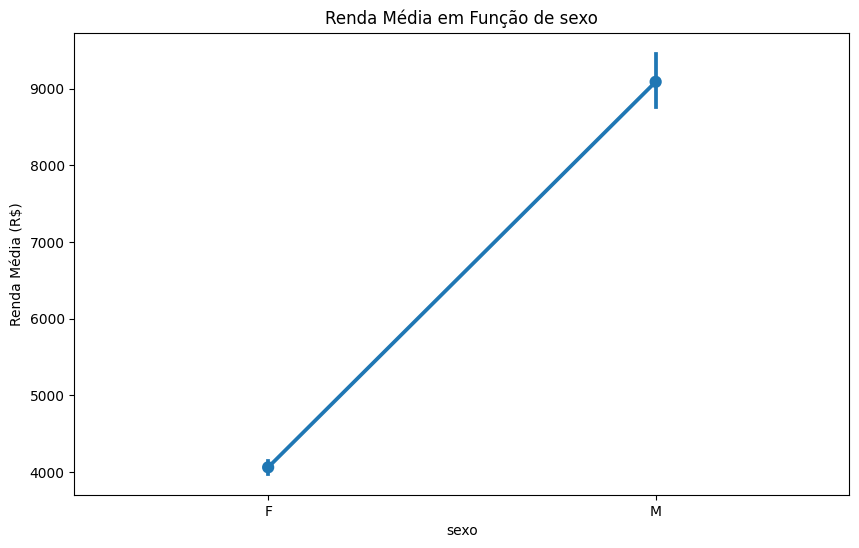

In [21]:
point('sexo')

A renda média se apresenta estatísticamente diferente para cada classe dentro da variável `sexo`, confirmando que a mesma apresenta potêncial preditivo. 

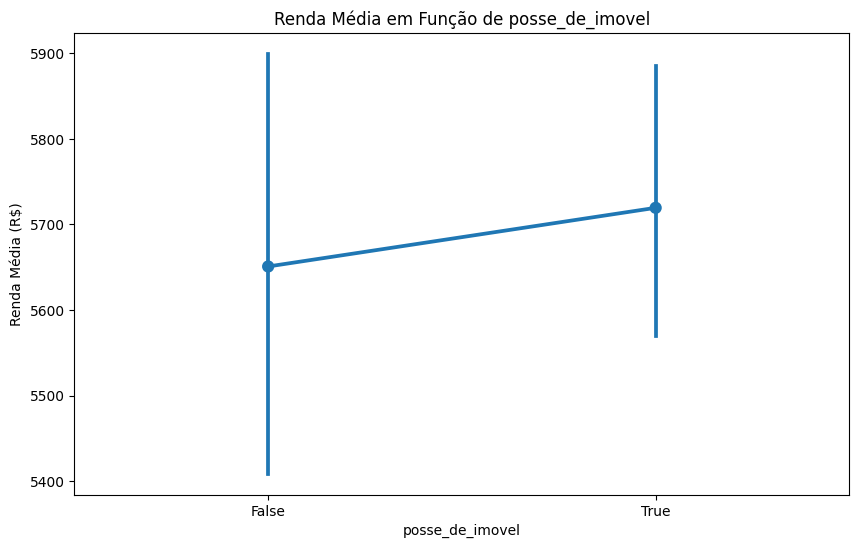

In [23]:
point('posse_de_imovel')

Não apresenta potencial preditivo, pois não é possível diferenciar a renda média utilizando a variável `posse_de_imovel`.

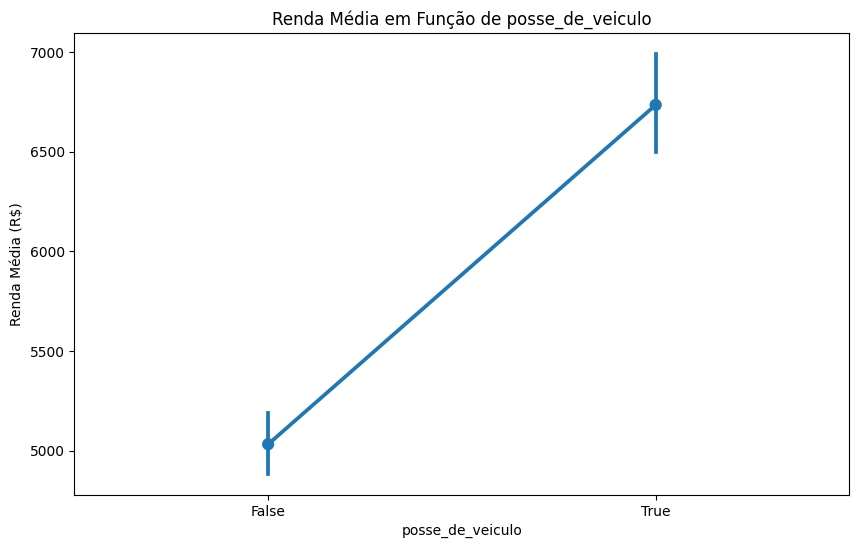

In [25]:
point('posse_de_veiculo')

A renda média é estatísticamente diferente para as diferentes classes da variável `posse_de_veiculo`. Apresentando um potencial preditivo para `renda`.

Utilizando o barplot para avaliar a relação das outras variáveis categóricas com a variável alvo `renda`:

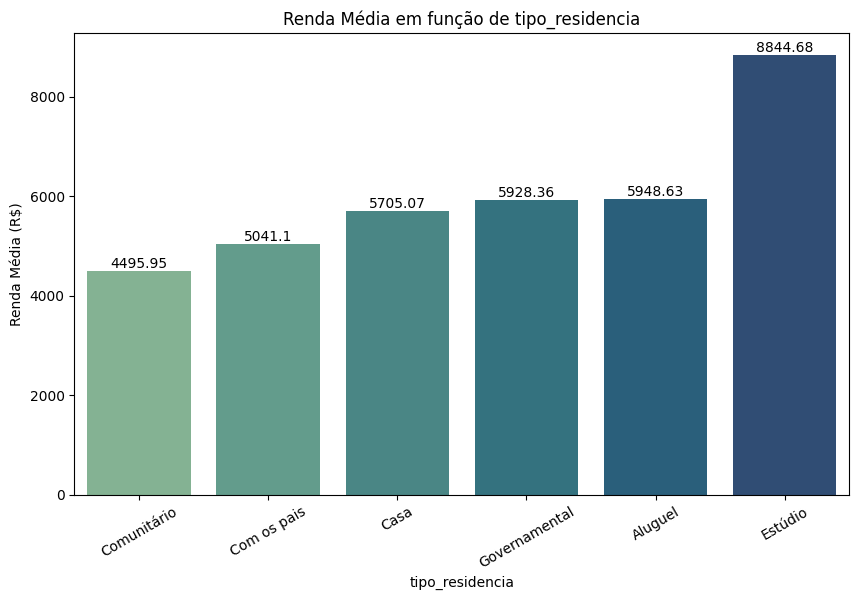

In [27]:
bar('tipo_residencia')

Apresenta diferentes valores de renda média para algumas classe. Já outras, apresentam uma diferença muito pequena para ser estatísticamente diferente, não apresentando um potencial preditivo tão grande.

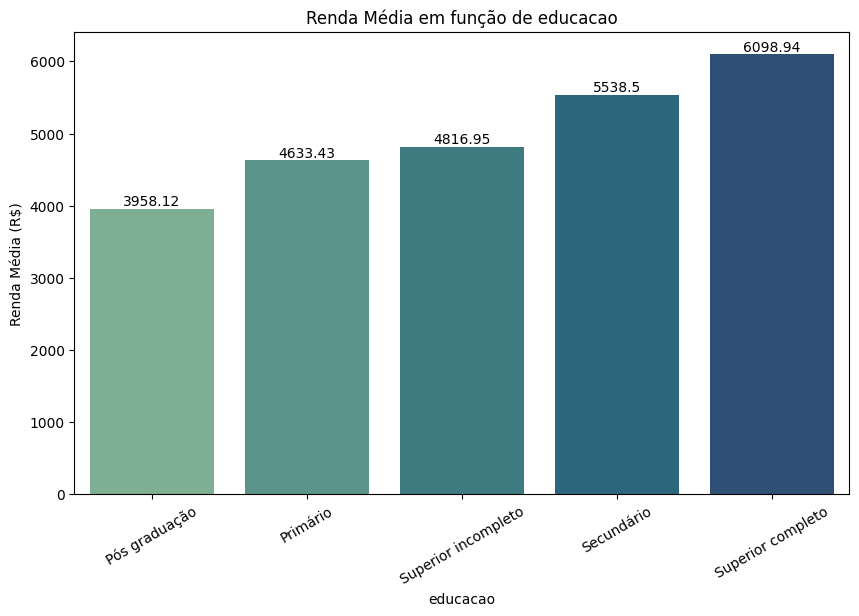

In [29]:
bar('educacao')

A variável `educacao` já apresenta uma diferença mais bem distribuída, contendo informações relevantes para a previsão da renda.

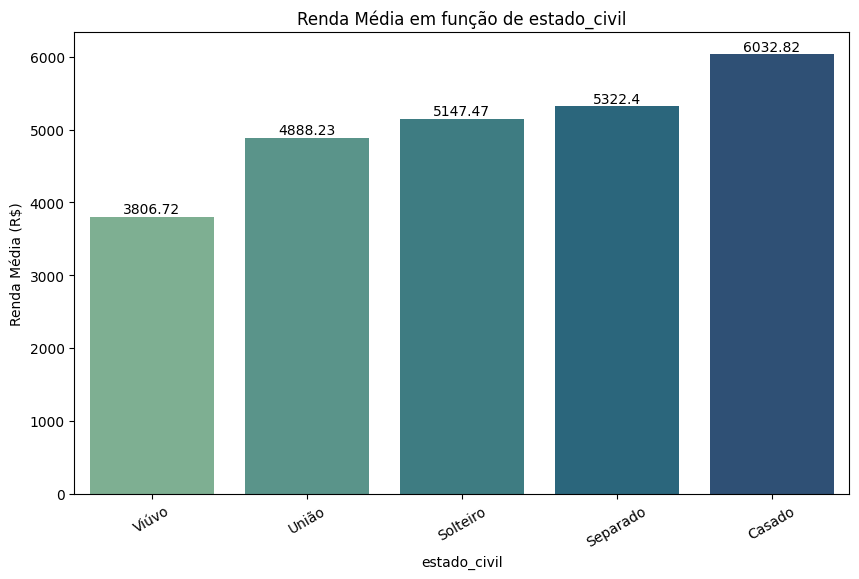

In [31]:
bar('estado_civil')

A variável `estado_civil` também apresenta uma diferença de classes bem distribuída. Contendo também informações relevantes para a predição.

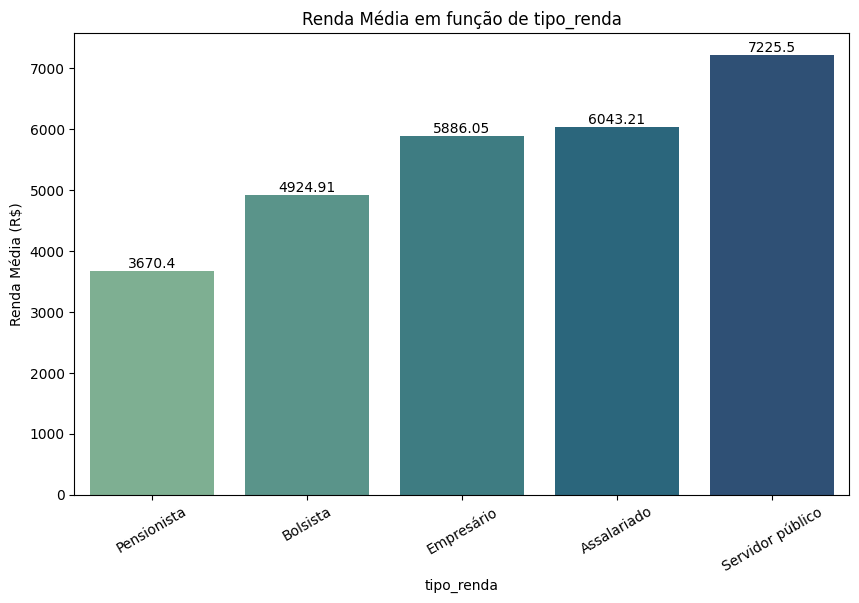

In [33]:
bar('tipo_renda')

A variável `tipo_renda` apresenta uma diferença um pouco mais marcante que as outras variáveis analisadas, contendo apenas duas classes com valores de renda média próximos. Sendo assim, também é uma variável com um potencial preditivo para `renda`.

Todas as variáveis categóricas analisadas apresentam diferenças nos valores médios para `renda`, algumas com mais e outras com menos, em diferentes classes de cada variável. Portanto, os dados categóricos contém infomações relevantes para a previsão da `renda`.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



##### Seleção:

Elimina as variáveis não úteis para a criação do modelo, mantendo somente aquelas que contém qualquer informação relevante.

In [35]:
renda.drop(['id_cliente', 'Unnamed: 0', 'data_ref'], axis=1, inplace = True)

In [37]:
renda.head(5)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


##### Limpeza:

Análisando os dados faltantes dentro do DataFrame:

,tempo_emprego,porcentagem_tempo_emprego
faltantes,2573,17.15
sem_faltantes,12427,82.85
total,15000,100.00


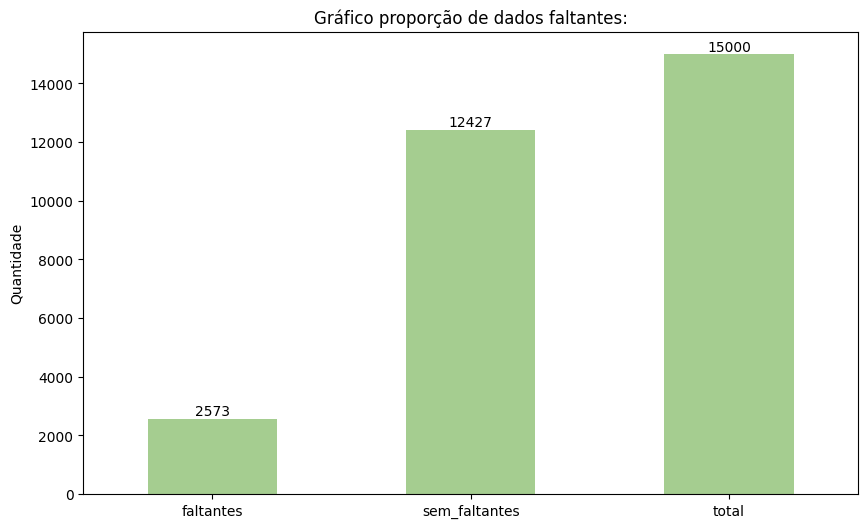

In [39]:
dados_faltantes_dict = {}

if renda.isna().any().sum()>0:
    
       for col in renda.columns:
           
            if renda[col].isna().any():
                
                perc = 'porcentagem' + f'_{col}'
                qnt = renda[renda[col].isna()].shape[0]
                total = renda.shape[0]
                sem_na = renda.dropna().shape[0]
                dic = {
                       col: {'faltantes': qnt, 
                             'sem_faltantes': sem_na,
                             'total': total},
                       
                       perc: {'faltantes': round(qnt/total*100, 2),
                              'sem_faltantes': round(sem_na/total*100, 2),
                              'total': 100}
                       }
                dados_faltantes_dict.update(dic)
else:
       print('Não há dados faltantes.')

if dados_faltantes_dict != {}:

       dados_faltantes = pd.DataFrame(dados_faltantes_dict)
       
       plt.figure(figsize=(10,6))
       ax = dados_faltantes.tempo_emprego.plot(kind='bar', colormap='crest')
       ax.set_title('Gráfico proporção de dados faltantes:')
       ax.set_ylabel('Quantidade')
       ax.tick_params(axis='x', rotation=0)
       ax.bar_label(ax.containers[0], fontsize=10)
       leg = plt.legend()
       ax.get_legend().remove()

dados_faltantes

Como é possível se notar acima, a única variável que possui dados faltantes é `tempo_emprego`. Contendo 2573 dados faltantes, que correspondem a 17,15% dos dados preenchidos. Sendo esta uma pocentagem baixa, apenas exluí-los não irá afetar o restante dos dados.

In [41]:
renda.dropna(subset='tempo_emprego', inplace=True)

##### Construção:

Tratando as variáveis para um formato útil para a seleção delas e criação do modelo:

In [43]:
renda['sexo'] = renda['sexo'].map({'M': 1, 'F': 0})
renda_dummies = pd.get_dummies(renda, dtype=int)
renda_dummies[['posse_de_veiculo', 'posse_de_imovel']] = renda_dummies[['posse_de_veiculo', 'posse_de_imovel']].astype(int)

Pode-se observar que a criação de Dummies fez com que as variáveis assumissem caractéres não apropriados para a utilização em nomes de variáveis.

In [45]:
renda_dummies.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'renda',
       'tipo_renda_Assalariado', 'tipo_renda_Bolsista',
       'tipo_renda_Empresário', 'tipo_renda_Pensionista',
       'tipo_renda_Servidor público', 'educacao_Primário',
       'educacao_Pós graduação', 'educacao_Secundário',
       'educacao_Superior completo', 'educacao_Superior incompleto',
       'estado_civil_Casado', 'estado_civil_Separado', 'estado_civil_Solteiro',
       'estado_civil_União', 'estado_civil_Viúvo', 'tipo_residencia_Aluguel',
       'tipo_residencia_Casa', 'tipo_residencia_Com os pais',
       'tipo_residencia_Comunitário', 'tipo_residencia_Estúdio',
       'tipo_residencia_Governamental'],
      dtype='object')

Utilizando o método replace para tratar as variáveis.

In [47]:
col = renda_dummies.columns.to_list()
col_lower = []

for i in col:
    x = i.lower()
    y = x.replace('á', 'a')
    y = y.replace(' ', '_')
    y = y.replace('ã', 'a')
    y = y.replace('ú', 'u')
    y = y.replace('ó', 'o')
    col_lower.append(y)
    
renda_dummies.columns = col_lower

Agora as variáveis se encontram com os nomes em um formato adequado.

In [49]:
renda_dummies.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'renda',
       'tipo_renda_assalariado', 'tipo_renda_bolsista',
       'tipo_renda_empresario', 'tipo_renda_pensionista',
       'tipo_renda_servidor_publico', 'educacao_primario',
       'educacao_pos_graduaçao', 'educacao_secundario',
       'educacao_superior_completo', 'educacao_superior_incompleto',
       'estado_civil_casado', 'estado_civil_separado', 'estado_civil_solteiro',
       'estado_civil_uniao', 'estado_civil_viuvo', 'tipo_residencia_aluguel',
       'tipo_residencia_casa', 'tipo_residencia_com_os_pais',
       'tipo_residencia_comunitario', 'tipo_residencia_estudio',
       'tipo_residencia_governamental'],
      dtype='object')

Separando a base em treino e teste, para que assim seja possível fazer a avaliação das variáveis estatisticamente significativas.

In [51]:
X, y = renda_dummies.drop('renda', axis=1), renda_dummies['renda']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100, shuffle=True)
Xy_train = pd.concat([X_train, y_train], axis=1) #Utilizando o concat para que seja possivel rodar a regularização LASSO

In [57]:
Xy_train

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,tipo_renda_assalariado,tipo_renda_bolsista,tipo_renda_empresario,...,estado_civil_solteiro,estado_civil_uniao,estado_civil_viuvo,tipo_residencia_aluguel,tipo_residencia_casa,tipo_residencia_com_os_pais,tipo_residencia_comunitario,tipo_residencia_estudio,tipo_residencia_governamental,renda
3889,1,1,0,0,50,3.441096,2.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1338.93
14483,0,0,0,0,52,2.745205,1.0,1,0,0,...,0,0,0,0,1,0,0,0,0,20103.27
762,0,1,0,0,38,6.539726,2.0,1,0,0,...,0,0,0,0,1,0,0,0,0,839.21
3078,0,1,1,0,27,7.624658,2.0,0,0,1,...,0,0,0,0,1,0,0,0,0,819.95
10423,0,0,0,0,47,4.550685,2.0,1,0,0,...,0,0,0,0,1,0,0,0,0,3333.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1,1,1,1,37,0.265753,3.0,1,0,0,...,0,0,0,0,1,0,0,0,0,2744.44
14610,1,1,1,1,41,4.016438,3.0,0,0,1,...,0,0,0,0,1,0,0,0,0,1497.03
9679,0,0,1,2,36,18.043836,4.0,1,0,0,...,0,0,0,0,1,0,0,0,0,4617.15
8373,1,0,1,0,37,2.701370,2.0,1,0,0,...,0,0,0,0,1,0,0,0,0,2343.19


Para realizar a seleção das variáveis estatisticamente significativas, utilizaremos da biblioteca statsmodels. Utilizando da técnica de regularização LASSO, faremos um laço de repetição onde será variado o valor de `alpha`. Desta forma, será possível realizar a seleção de quais variáveis geram os melhores parametros para um modelo.

In [59]:
md = smf.ols('''np.log(renda) ~
             sexo +
             posse_de_veiculo + 
             qtd_filhos + 
             
             tipo_renda_assalariado + tipo_renda_bolsista + tipo_renda_empresario + tipo_renda_pensionista + tipo_renda_servidor_publico +
             
             educacao_primario + educacao_pos_graduaçao + educacao_secundario + educacao_superior_completo + educacao_superior_incompleto +
             
             estado_civil_casado + estado_civil_separado + estado_civil_solteiro + estado_civil_uniao + estado_civil_viuvo +
             
             tipo_residencia_aluguel + tipo_residencia_casa + tipo_residencia_com_os_pais + tipo_residencia_comunitario + 
             tipo_residencia_estudio +
             tipo_residencia_governamental +
             
             idade + 
             tempo_emprego + 
             qt_pessoas_residencia''' ,data=Xy_train)

alphas = [0, 0.001, 0.0025, 0.005, 0.01, 0.025, 0.05, 0.1]

MSE_lasso = {}
r_quad_lasso = {}
adj_r_quad_lasso = {}
aic_lasso = {}
bic_lasso = {}

for i in alphas:
    reg = md.fit_regularized(method = 'elastic_net',
                             refit = True,
                             L1_wt = 1,
                             alpha = i)   
    
    y_pred = np.exp(reg.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    
    MSE_lasso[i] = mse
    r_quad_lasso[i] = round(reg.rsquared,3)
    adj_r_quad_lasso[i] = round(reg.rsquared_adj,3)
    aic_lasso[i] = round(reg.aic,3)
    bic_lasso[i] = round(reg.bic,3)
    
    print(f'\n\n Valor de alpha = {i} \n MSE: {mse}\n\n {reg.summary()}')



 Valor de alpha = 0 
 MSE: 44094863.80372512

                             OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     180.7
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:12:02   Log-Likelihood:                -10209.
No. Observations:                9320   AIC:                         2.048e+04
Df Residuals:                    9292   BIC:                         2.068e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

Criação de um DataFrame com os parametros gerados pela regularização LASSO:

In [61]:
parametros_lasso = pd.DataFrame({'MSE': MSE_lasso})
parametros_lasso['R_quadrado'] = r_quad_lasso
parametros_lasso['R_quadrado_ajustado'] = adj_r_quad_lasso
parametros_lasso['AIC'] = aic_lasso
parametros_lasso['BIC'] = bic_lasso

parametros_lasso

,MSE,R_quadrado,R_quadrado_ajustado,AIC,BIC
0.0000,4.409486e+07,0.352,0.351,20475.882,20682.940
0.0010,4.409115e+07,0.351,0.350,20466.152,20580.391
0.0025,4.398519e+07,0.351,0.350,20468.247,20561.066
0.0050,4.419547e+07,0.350,0.349,20476.735,20555.274
0.0100,4.456441e+07,0.346,0.346,20525.857,20575.836
0.0250,4.489196e+07,0.341,0.341,20586.128,20621.827
0.0500,4.489196e+07,0.341,0.341,20586.128,20621.827
0.1000,4.489196e+07,0.341,0.341,20586.128,20621.827


O modelo que possuí os melhores parametros é o com o valor de alpha = 0.0025, pois é o que possuí o menor MSE e um dos maiores $R^2$, com um valor de AIC mais baixo quando comparado com os outros.

Criação de uma regressão apenas com as variáveis selecionadas pela regularização LASSO com alpha = 0.0025:

In [63]:
md = smf.ols('''np.log(renda) ~
             sexo + 
             qtd_filhos + 
             tipo_renda_assalariado + tipo_renda_servidor_publico +
             educacao_secundario + educacao_superior_incompleto +
             estado_civil_casado + estado_civil_solteiro +
             idade + 
             tempo_emprego + 
             qt_pessoas_residencia''' ,data=Xy_train)

reg = md.fit()


y_pred = np.exp(reg.predict(X_test))
mse = mean_squared_error(y_test, y_pred)

print(f'\n\n MSE: {mse}')
reg.summary()



 MSE: 43985187.692832544


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     457.2
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:12:36   Log-Likelihood:                -10221.
No. Observations:                9320   AIC:                         2.047e+04
Df Residuals:                    9308   BIC:                         2.055e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        7.4933      0.072    103.943      0.000       7.352       7.635
sexo                             0.7972      0.016     49.659      0.000       0.766       0.829
qtd_filhos                       0.0540      0.037      1.459      0.144      -0.019       0.127
tipo_renda_assalariado          -0.1506      0.017     -8.734      0.000      -0.184      -0.117
tipo_renda_servidor_publico     -0.1013      0.028     -3.635      0.000      -0.156      -0.047
educacao_secundario             -0.1019      0.016     -6.411      0.000      -0.133      -0.071
educacao_superior_incompleto    -0.0821      0.037     -2.208      0.027      -0.155      -0.009
estado_civil_casado              0.0028      0.028      0.100      0.920      -0.052       0.058
estado_civil_solteiro           -0.0651      0.033     -1.956      0.050      -0.130       0.000
idade                            0.0057      0.001      6.252      0.000       0.004       0.007
tempo_emprego                    0.0614      0.001     51.277      0.000       0.059       0.064
qt_pessoas_residencia           -0.0353      0.036     -0.986      0.324      -0.106       0.035
==============================================================================
Omnibus:                        0.203   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.904   Jarque-Bera (JB):                0.177
Skew:                           0.006   Prob(JB):                        0.915
Kurtosis:                       3.018   Cond. No.                         495.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Seleção das variáveis significativas e criação de um DataFrame apenas com as selecionadas:

In [65]:
var_significativa = ['sexo', 
                    'qtd_filhos', 
                    'tipo_renda_assalariado',
                    'tipo_renda_servidor_publico',
                    'educacao_secundario',
                    'educacao_superior_incompleto',
                    'estado_civil_casado',
                    'estado_civil_solteiro',
                    'idade',
                    'tempo_emprego',
                    'qt_pessoas_residencia',
                    'renda'
                    ]
renda_significativa = renda_dummies[var_significativa]
renda_significativa.head()

,sexo,qtd_filhos,tipo_renda_assalariado,tipo_renda_servidor_publico,educacao_secundario,educacao_superior_incompleto,estado_civil_casado,estado_civil_solteiro,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,0,0,0,1,0,0,1,26,6.602740,1.0,8060.34
1,1,0,1,0,0,0,1,0,28,7.183562,2.0,1852.15
2,0,0,0,0,0,0,1,0,35,0.838356,2.0,2253.89
3,0,1,0,1,0,0,1,0,30,4.846575,3.0,6600.77
4,1,0,1,0,1,0,0,1,33,4.293151,1.0,6475.97


Separação em treino e teste para aplicação no modelo:

In [67]:
X, y = renda_significativa.drop('renda', axis=1), renda_significativa['renda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150, shuffle=True)

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


Neste projeto será as árvores de decisão. Como o objetivo é realizar a previsão da renda, que é uma variável quantitativa contínua, será utilizada a estrutura de árvore de regressão.

Nesta ocasião será rodada a árvore de forma simples, apenas aplicando a base de dados com as variáveis selecionadas anteriormente. Desta forma, será possível realizar a análise quanto aos hiperparametros e como melhora-los.

In [69]:
tree_simple = DecisionTreeRegressor(random_state=140)

#### Rodando o modelo


Treino do modelo apenas com as variáveis selecionadas:

In [75]:
tree_simple.fit(X_train, y_train)

DecisionTreeRegressor(random_state=140)

Criação da base de dados com os hiperparametros do modelo treinado para comparação:

In [77]:
pd.set_option('float_format', '{:.3f}'.format)

index=['r_squared', 'mean_absolute_error', 'root_mean_squared_error']

hiperpametros_simple = pd.DataFrame({'conjunto_treino_simple': r2_score(y_train, tree_simple.predict(X_train))}, index= index)
hiperpametros_simple.loc['mean_absolute_error', 'conjunto_treino_simple'] = mean_absolute_error(y_train, tree_simple.predict(X_train))
hiperpametros_simple.loc['root_mean_squared_error', 'conjunto_treino_simple'] = mean_squared_error(y_train, tree_simple.predict(X_train)) ** 0.5
hiperpametros_simple['conjunto_teste_simple'] = r2_score(y_test, tree_simple.predict(X_test))
hiperpametros_simple.loc['mean_absolute_error','conjunto_teste_simple'] = mean_absolute_error(y_test, tree_simple.predict(X_test))
hiperpametros_simple.loc['root_mean_squared_error', 'conjunto_teste_simple'] = mean_squared_error(y_test, tree_simple.predict(X_test)) ** 0.5

hiperpametros_simple

,conjunto_treino_simple,conjunto_teste_simple
r_squared,0.821,0.221
mean_absolute_error,1492.571,3196.674
root_mean_squared_error,3856.857,7332.570


Como pode-se observar o valor de $R^2$ se difere muito entre o conjunto de treino e teste, o mesmo acontece para o erro médio absoluto e para a raiz do erro quadratico médio.

Teste da melhor profundidade e do número mínimo de amostras por folha da árvore:

Text(0.5, 36.72222222222221, 'Número mínimo obs por folha \n\n O valor de R quadrado se encontra no interior de cada célula')

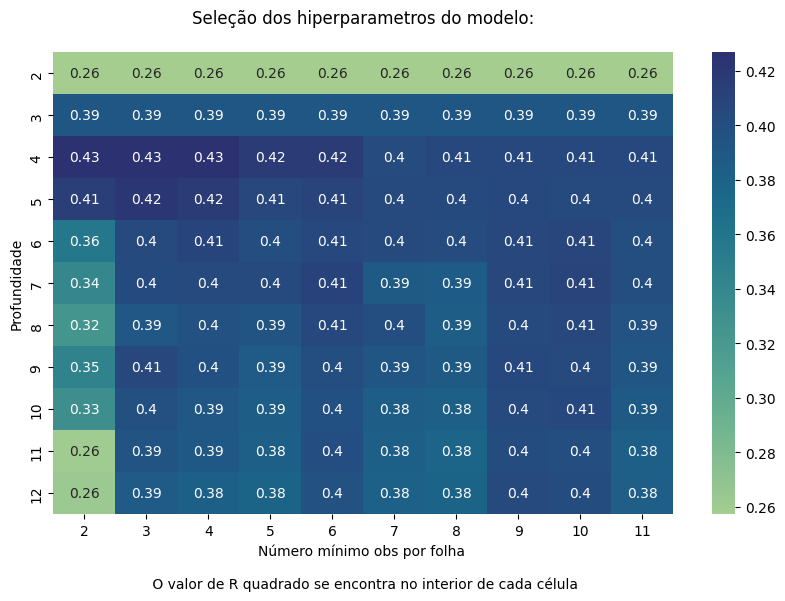

In [80]:
rsqr = []
ind_i = []
ind_j = []

for i in range(2, 13):
    for j in range(2, 12):
        tree = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        tree.fit(X_train, y_train)
        rsq = tree.score(X_test, y_test)
        rsqr.append(rsq)
        ind_i.append(i)
        ind_j.append(j)
        
df_rsqr = pd.DataFrame({'r_quadrado':rsqr, 
                        'Profundidade':ind_i, 
                        'n_minimo_obs_folhas':ind_j}
                       )

plt.figure(figsize=(10,6))
plt.title('Seleção dos hiperparametros do modelo:\n')
sns.heatmap(df_rsqr.pivot(index='Profundidade',
                          columns='n_minimo_obs_folhas',
                          values='r_quadrado'),
            cmap='crest',
            annot=True
            )
plt.xlabel('Número mínimo obs por folha \n\n O valor de R quadrado se encontra no interior de cada célula')

De acordo com os dados gerados, a profundidade de 4 junto com 2, 3 ou 4 número mínimo de amostras por folha geram o melhor valor de $R^2$ para o modelo. Portanto, afim de simplificar a árvore, vamos trabalhar com o número 2.

In [82]:
tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, random_state=140)

In [84]:
tree = tree.fit(X_train, y_train)

In [86]:
index=['r_squared', 'mean_absolute_error', 'root_mean_squared_error']

hiperpametros = pd.DataFrame({'conjunto_treino': r2_score(y_train, tree.predict(X_train))}, index= index)
hiperpametros.loc['mean_absolute_error', 'conjunto_treino'] = mean_absolute_error(y_train, tree.predict(X_train))
hiperpametros.loc['root_mean_squared_error', 'conjunto_treino'] = mean_squared_error(y_train, tree.predict(X_train)) ** 0.5
hiperpametros['conjunto_teste'] = r2_score(y_test, tree.predict(X_test))
hiperpametros.loc['mean_absolute_error','conjunto_teste'] = mean_absolute_error(y_test, tree.predict(X_test))
hiperpametros.loc['root_mean_squared_error', 'conjunto_teste'] = mean_squared_error(y_test, tree.predict(X_test)) ** 0.5

hiperpametros

,conjunto_treino,conjunto_teste
r_squared,0.484,0.427
mean_absolute_error,3443.028,3411.293
root_mean_squared_error,6555.994,6288.597


De acordo com os dados acima, nota-se que os valores, tanto para o conjunto de treino quanto para o conjunto de teste, apresetam valores semelhantes, se comportando de forma mais homogenea, o que é melhor para a predição.

## Etapa 5 Crisp-DM: Avaliação dos resultados


##### Avaliação das métricas do modelo final criado:

In [88]:
hiperpametros

,conjunto_treino,conjunto_teste
r_squared,0.484,0.427
mean_absolute_error,3443.028,3411.293
root_mean_squared_error,6555.994,6288.597


Como exibido pelo DataFrame acima, o valor do coeficiente de determinação, ou $R^2$, é cerca de 48% explicativo em relação aos dados previstos para o conjunto de treino, e 42% para o conjunto de teste. 

Já o MAE (Mean Absolute Error) nos mostra que a renda prevista sofre uma variação em torno de 3400 para mais ou para menos do valor real, tanto para o conjunto de treino, quanto para o conjunto de teste. 

O MSE (Mean Squared Error) consiste na média do erro das previsões ao quadrado. Para obter uma aproximação maior dos valores reais, extraímos a raiz do MSE utilizando a métrica RMSE (Root Mean Squared Error), utilizando este recuso é possível analisar o quanto o modelo está errando, sendo penalizado para possíveis outliers. Com o conjunto de treino apresentando um erro de cerca de 6500 do valor real, e o conjunto de teste com cerca de 6200. 

Os hiperparametros do modelo foram ajutados para a obtenção das melhores métricas. 

In [90]:
print('Razão da renda média com o erro médio no conjunto de treino:')
print(renda['renda'].mean()/hiperpametros['conjunto_treino'].loc['mean_absolute_error'])
print('\nRazão da renda média com o erro médio no conjunto de treino:')
print(renda['renda'].mean()/hiperpametros['conjunto_teste'].loc['mean_absolute_error'])

Razão da renda média com o erro médio no conjunto de treino:
1.776500256869801

Razão da renda média com o erro médio no conjunto de treino:
1.7930267050293092


Como desmonstrado acima, a média dos valores de renda é maior que os erros médios dos valores previstos, desmonstrando a capacidade preditiva do modelo. 

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

Como a previsão de renda é comumente utilizada por instituições financeiras finalidades como limite de crédito, valor previsto de emprestimo e muitas outras aplicações, a função abaixo cria classes de limite de crédito, tipo de cartão e valor de emprestimo para cada valor diferente de renda prevista.

Claro que tais itens são definidos utilizando muitas outras variáveis, como a relação com outras instiuições financeiras, se o cliente é inadimplente, posse de bens e mais outras que forem necessárias para a determinação dos mesmos. Mas para efeitos de visualização, foi utilizado apenas a variável renda. 

O cálculo do valor do emprestimo foi feito com base na renda. Calculado para que seja pago em 24x, com o valor de cada parcela não ultrapassando cerca de 30% da renda total prevista, somando assim o montante final.

Função de classificação de crédito:

In [93]:
def prever_renda(df: pd.DataFrame):
    renda_prevista = list(tree.predict(df))
    df_renda = []
    for i in renda_prevista:
        if i <= 2500:
            dic = {'renda_prevista': i, 'limite_de_credito': 3000, 'classe_cartao': 'standard', 'emprestimo_concedido': 18000}
            df_renda.append(dic)
        elif i <= 5000:
            dic = {'renda_prevista': i, 'limite_de_credito': 6000, 'classe_cartao': 'gold', 'emprestimo_concedido': 36000}
            df_renda.append(dic)
        elif i <= 7500:
            dic = {'renda_prevista': i, 'limite_de_credito': 8500, 'classe_cartao': 'platinum', 'emprestimo_concedido': 54000}
            df_renda.append(dic)
        elif i <= 10000:
            dic = {'renda_prevista': i, 'limite_de_credito': 15000, 'classe_cartao': 'black', 'emprestimo_concedido': 72000}
            df_renda.append(dic)
        elif i <= 15000:
            dic = {'renda_prevista': i, 'limite_de_credito': 20000, 'classe_cartao': 'black', 'emprestimo_concedido': 100000}
            df_renda.append(dic)
        elif i > 15000:
            dic = {'renda_prevista': i, 'limite_de_credito': 'ilimitado', 'classe_cartao': 'black', 'emprestimo_concedido': 150000}
            df_renda.append(dic)
        
    df_renda = pd.DataFrame(df_renda)
    return df_renda.sample(15)

DataFrame com as previsões e classificações:

In [95]:
prever_renda(X_test)

,renda_prevista,limite_de_credito,classe_cartao,emprestimo_concedido
1253,3521.751,6000,gold,36000
304,8336.886,15000,black,72000
850,8037.629,15000,black,72000
3409,3521.751,6000,gold,36000
424,15802.013,ilimitado,black,150000
803,2816.735,6000,gold,36000
2641,2816.735,6000,gold,36000
2695,4827.253,6000,gold,36000
3336,58958.308,ilimitado,black,150000
3700,2816.735,6000,gold,36000
